# 주어진 데이터를 사용하여 키와 몸무개를 예측합니다.

## 데이터준비

In [8]:
import pandas as pd

filepath = './dataset/data.csv'
df = pd.read_csv(filepath)
height = df['Height']
weight = df['Weight']

height_list = []
weight_list = []

for h in height:
    height_list.append(h)

for w in weight:
    weight_list.append(w)

In [9]:
import numpy as np

height_array = np.array(height_list)
weight_array = np.array(weight_list)


In [10]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(
    height_array, weight_array, random_state=15)


In [11]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

## 데이터 시각화하기

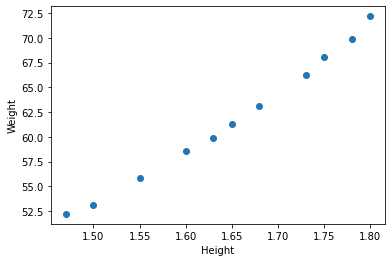

In [12]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

## 단순 선형회귀 모델을 훈련하기

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)
print(lr.score(test_input, test_target))

0.9859201510017104


98%라는 높은 정확도를 보여주었습니다. 이제 위 모델에서 훈련한 직선을 산점도 위에 그려보도록 하겠습니다.

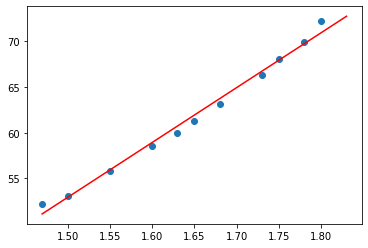

In [20]:
plt.scatter(train_input, train_target)
plt.plot([1.47, 1.83], [1.47*lr.coef_ + lr.intercept_, 1.83*lr.coef_+lr.intercept_], 'r')

